__Created by__: Dora Jiménez and Anthony D. Cho

__Last update__: 2024.01.10

__Subject__: Big data Analysis using Python in Fisheries

# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

print('(Version) Numpy:', np.__version__)
print('(Version) Pandas:', pd.__version__)
print('(Version) Seaborn:', sns.__version__)

(Version) Numpy: 1.26.1
(Version) Pandas: 2.0.1
(Version) Seaborn: 0.12.2


## Case study A: The Von Bertalanffy Model

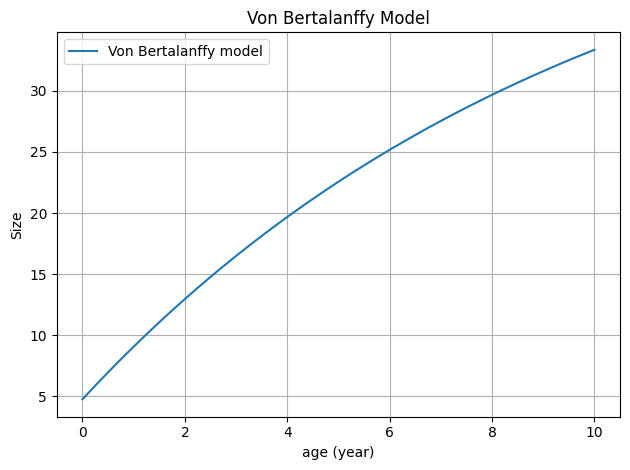

In [16]:
def von_bertalanffy(t, L_infty, k, t_0):
    """
    DESCRIPTION:
        Von Bertalanffy model used to compute a Size given an age-value

    INPUT:
        @param t: age-value
        @type t: float or numpy.array of floats

        @param L_infty: Asymptotic size-value
        @type L_infty: float

        @param k: Growth rate
        @type k: float

        @param t_0: Theoretical age at which the size would be zero.
        @type t_0: int
        
    OUTPUT:
        @param size_value: estimated Size
        @type size_value: float or numpy.array of floats

    """
    ## Estimate Size
    size_value = L_infty * (1 - np.exp(-k * (t - t_0)))

    return size_value

# Parameters
## Asymptotic size-value
L_infty = 50  # Talla asintótica

## Growth rate
k = 0.1

## Theoretical age at which the size would be zero.
t_0 = -1

# A generated dataset
ages = np.linspace(0, 10, 100)
sizes = von_bertalanffy(ages, L_infty, k, t_0)

# Display results
plt.plot(ages, sizes, 
         label='Von Bertalanffy model')
plt.xlabel('age (year)')
plt.ylabel('Size')
plt.title('Von Bertalanffy Model')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Case study B: Estimating growth rates

In [11]:
## Let's create a dataset (e.g. Fish capture) using a Dictionary
data = {
    'Specie': ['Tuna', 'Salmon', 'Tuna', 'Salmon', 
    'Tuna', 'Salmon'],
    'Size': [80, 60, 85, 58, 78, 62],
    'Age': [3, 2, 4, 2, 3, 2]
}

## Convert into a DataFrame object
data = pd.DataFrame(data)

## Let's group by Specie and compute basic statistics based on Size
stats_by_specie = data.groupby('Specie')['Size'].describe()

## Let's compute average growth rate per Specie
avg_growth_rate = data.groupby('Specie')['Size'] \
     .pct_change().mean()

## Compute the Age Structure of the fishing population
age_structure = data.groupby('Age')['Specie'] \
     .value_counts().unstack().fillna(0)

## Display results
print('Descriptive statistics by Specie')
print(stats_by_specie)
print('\nAverage growth rate by Specie')
print(avg_growth_rate)
print('\nAge Structure of the fishing population')
print(age_structure)


Descriptive statistics by Specie
        count  mean       std   min   25%   50%   75%   max
Specie                                                     
Salmon    3.0  60.0  2.000000  58.0  59.0  60.0  61.0  62.0
Tuna      3.0  81.0  3.605551  78.0  79.0  80.0  82.5  85.0

Average growth rate by Specie
0.003944810682893818

Age Structure of the fishing population
Specie  Salmon  Tuna
Age                 
2          3.0   0.0
3          0.0   2.0
4          0.0   1.0


## Case study C: Example of visualization using a box diagram

(48, 24)


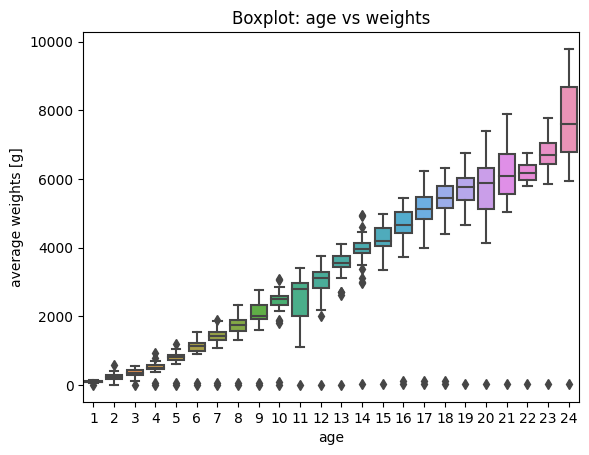

In [32]:
## load data
dataset = pd.read_csv('Age_weights.csv', 
                      sep=';', 
                      header=None)
print(dataset.shape)

## Display boxplot and customizing
sns.boxplot(data=dataset)
plt.xlabel('age')
plt.ylabel('average weights [g]')
plt.title('Boxplot: age vs weights')
plt.xticks(ticks=range(dataset.shape[1]), 
           labels=range(1, dataset.shape[1]+1))
plt.show()

## Case study D: Example of visualization of Catches by species

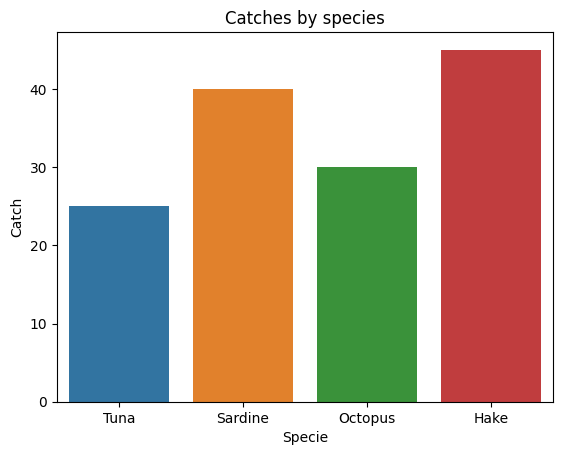

In [1]:
# Data
Species = ['Tuna', 'Sardine', 'Octopus', 'Hake']
values = [25, 40, 30, 45]

# Create a bar chart with Seaborn
sns.barplot(x=Species, y=values)

# Customize the chart
plt.title('Catches by species')
plt.xlabel('Specie')
plt.ylabel('Catch')

# Show graphic
plt.show()